In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Input

## Generate Data

In [3]:
X_train = np.linspace(-1, 1, 20)

In [4]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [6]:
X_test = np.linspace(-1, 1, 20)

In [5]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

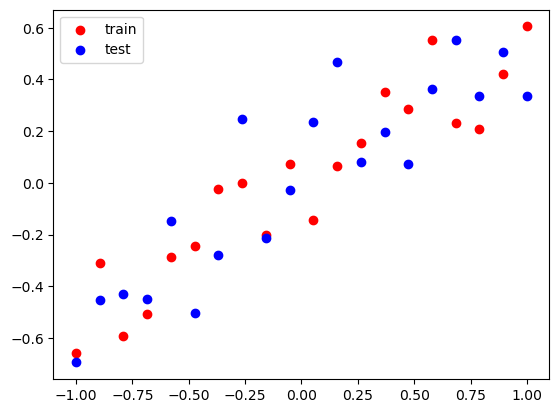

In [11]:
plt.scatter(X_train, y_train, c='red', label="train")
plt.scatter(X_test, y_test, c='blue', label='test')
plt.legend()
plt.show()

## Regression Model

In [37]:
model1 = keras.Sequential([
    Input(shape=(1,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation="linear")
])

In [38]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

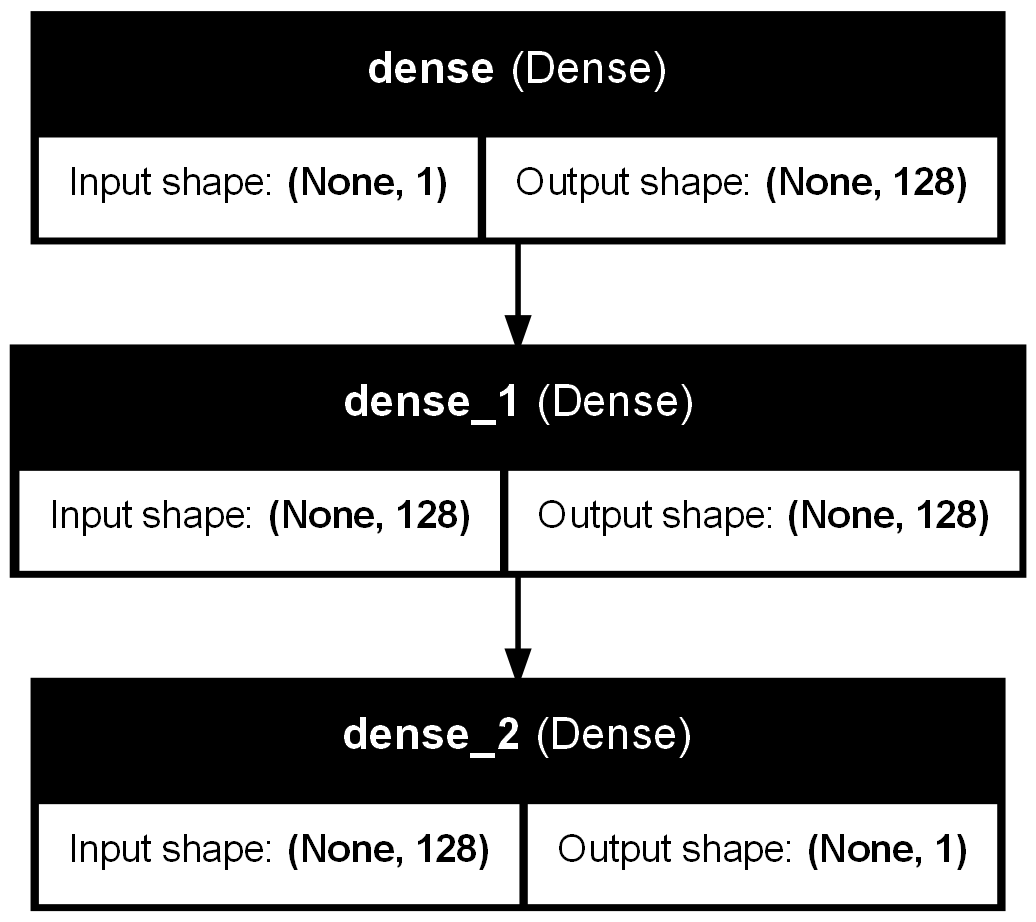

In [39]:
keras.utils.plot_model(model1, show_shapes=True, show_layer_names=True)

In [42]:
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='mse', metrics=['mse'])

In [47]:
# early_stopping_cb = keras.callbacks.EarlyStopping(monitor='mse', patience=5, verbose=1, min_delta=1e-4, restore_best_weights=True)

In [55]:
history = model1.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0132 - mse

In [56]:
# evaluate the model
_, train_mse = model1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.009510914795100689, Test: 0.037667132914066315


In [57]:
y_pred1 = model1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


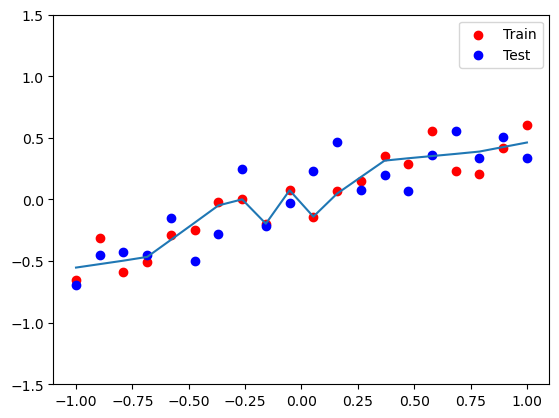

In [58]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

## Dropout Model 

In [59]:
model2 = keras.Sequential([
    Input(shape=(1,)),
    Dense(128, activation='relu'),
    Dropout(.2),
    Dense(128, activation='relu'),
    Dropout(.2),
    Dense(1, activation='linear')
])

In [60]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=.01), loss='mse', metrics=['mse'])

In [62]:
history2 = model2.fit(X_train, y_train, epochs=500, verbose=0, validation_data=(X_test, y_test))

In [63]:
# evaluate the model
_, train_mse = model2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.010987134650349617, Test: 0.037938669323921204


In [65]:
y_pred_2 = model2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


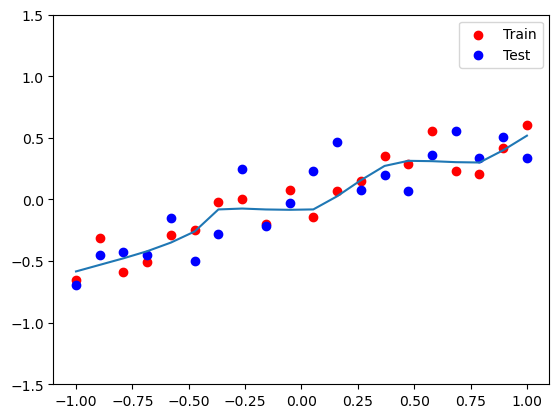

In [66]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()